In [318]:
# https://www.kaggle.com/code/charel/learn-by-example-rnn-lstm-gru-time-series

In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from tensorflow.keras.layers import Dropout,LSTM, BatchNormalization, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import matplotlib.image as mpimg

from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [320]:
# read csv file
train_df = pd.read_csv('train.csv', parse_dates=['Date'], index_col=['Date'])
#train_df = pd.read_csv('train.csv')
store_df = pd.read_csv('store.csv')

In [321]:
df = train_df.join(store_df.set_index('Store'), on='Store')

In [322]:
df = df.fillna(0)
df['StateHoliday'] = df.StateHoliday.replace(0, '0')
df['Promo2SinceYear'] = df['Promo2SinceYear'].astype('int8')
df['Promo2SinceYear'] = df['Promo2SinceYear'].astype('int8')

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 1

In [324]:
df.sort_values(by=['Store', 'Date'], inplace = True)
df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1,c,a,1270.0,9.0,2008.0,0,0.0,0,0
2013-01-02,1,3,5530,668,1,0,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0,0
2013-01-03,1,4,4327,578,1,0,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0,0
2013-01-04,1,5,4486,619,1,0,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0,0
2013-01-05,1,6,4997,635,1,0,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,1115,1,10712,608,1,1,0,1,d,c,5350.0,0.0,0.0,1,22.0,-36,"Mar,Jun,Sept,Dec"
2015-07-28,1115,2,8093,500,1,1,0,1,d,c,5350.0,0.0,0.0,1,22.0,-36,"Mar,Jun,Sept,Dec"
2015-07-29,1115,3,7661,473,1,1,0,1,d,c,5350.0,0.0,0.0,1,22.0,-36,"Mar,Jun,Sept,Dec"


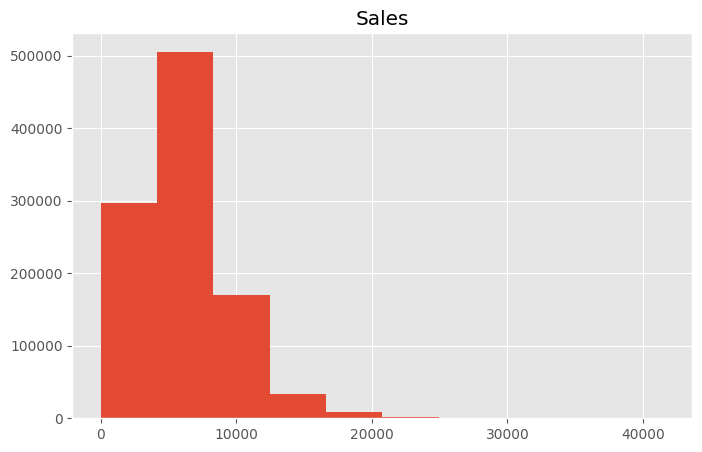

In [325]:
sales = df['Sales']
# plt.figure(figsize = (10,5), dpi = 100)
# plt.plot(sales)
# plt.show()
# histogram
plt.figure(figsize = (8,5), dpi = 100)
plt.hist(sales)
plt.title("Sales")
plt.show()

# sales1 = df[df['Sales'] != 0]
# sales1 = sales1['Sales']
# sales1 = sales1[0:500]
# plt.figure(figsize = (12,8), dpi = 100)
# sales1.plot()
# plt.show()

In [326]:
#df['Sales'] = np.log1p(df['Sales'])
#df['Sales'] = np.sqrt(df['Sales'])
df['Sales'] = np.cbrt(df['Sales'])

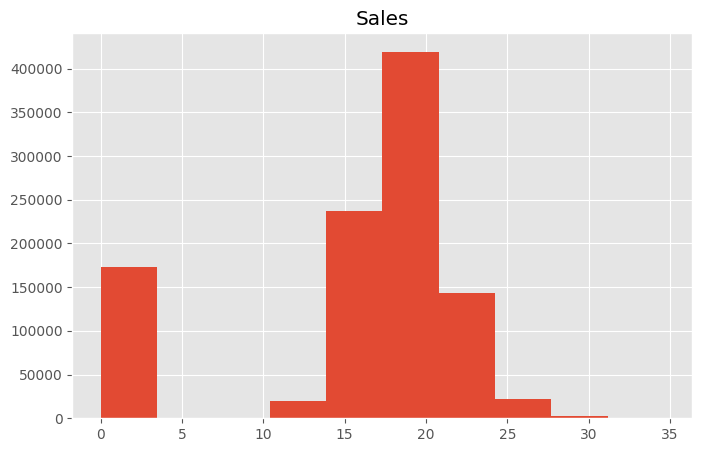

In [327]:
sales = df['Sales']
# plt.figure(figsize = (10,5), dpi = 100)
# plt.plot(sales)
# plt.show()
# histogram
plt.figure(figsize = (8,5), dpi = 100)
plt.hist(sales)
plt.title("Sales")
plt.show()

# sales1 = df[df['Sales'] != 0]
# sales1 = sales1['Sales']
# sales1 = sales1[0:500]
# plt.figure(figsize = (12,8), dpi = 100)
# sales1.plot()
# plt.show()

In [265]:
from sklearn.preprocessing import OrdinalEncoder
nominal_cols = df.columns[df.dtypes==object].tolist()
select_col = df[nominal_cols]
select_col = select_col.astype(str)
ord_enc = OrdinalEncoder()
encoded_data = ord_enc.fit_transform(select_col)
df[nominal_cols] = encoded_data

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  float64
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  float64
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  float64
 9   Assortment                 1017209 non-null  float64
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 1

In [267]:
# X = df.iloc[:,[0,1,4,5,6,7,8,9,10,11,12,13,14,15,16]]
# y = df.iloc[:,2]

X = df.drop(['Sales', 'Customers'], axis = 1).values
y = df[['Sales']].values

In [268]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)

y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y)

In [269]:
X.shape

(1017209, 15)

In [270]:
y.shape

(1017209, 1)

In [271]:
X = np.array(X).reshape(1017209, 15, 1)

In [272]:
# Splitting the data into train, validation, and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [194]:
model = tf.keras.models.Sequential()
model.add(LSTM(60, input_shape=(15, 1), activation = "tanh", recurrent_activation = "sigmoid"))
model.add(Dropout(0.1))
model.add(Dense(1))
model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.compile(optimizer=Adam(), loss='mean_squared_error')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 60)                14880     
                                                                 
 dropout_5 (Dropout)         (None, 60)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 61        
                                                                 
Total params: 14,941
Trainable params: 14,941
Non-trainable params: 0
_________________________________________________________________


In [195]:
# Train the model
history = model.fit(x_train, y_train, epochs=200, batch_size=160, validation_split=0.2, callbacks = [callback])

Epoch 1/200
4069/4069 [==============================] - 24s 5ms/step - loss: 0.0107 - val_loss: 0.0041
Epoch 2/200
4069/4069 [==============================] - 21s 5ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 3/200
4069/4069 [==============================] - 21s 5ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 4/200
4069/4069 [==============================] - 21s 5ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 5/200
4069/4069 [==============================] - 22s 5ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 6/200
4069/4069 [==============================] - 21s 5ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 7/200
4069/4069 [==============================] - 21s 5ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 8/200
4069/4069 [==============================] - 21s 5ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 9/200
4069/4069 [==============================] - 22s 5ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 10/200
4069/4069 [==============================] - 22s 5m

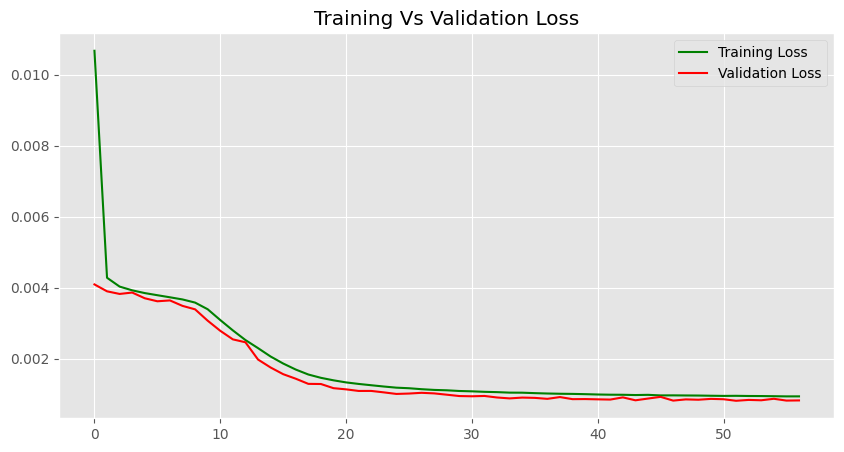

In [196]:
train_acc = history.history['loss']
val_acc = history.history['val_loss']

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(train_acc, color = 'green', label = 'Training Loss')
plt.plot(val_acc, color = 'red', label = 'Validation Loss')
plt.title('Training Vs Validation Loss')
plt.legend()

In [276]:
y_pred = model.predict(x_test)

6358/6358 [==============================] - 12s 2ms/step


In [277]:
import math
def rmse(y_true, y_pred):
    return math.sqrt(np.mean(np.square(y_pred - y_true)))

In [278]:
def rmspe(y_true, y_pred):
    value = (y_true - y_pred)/(y_true)
    value = value[np.isfinite(value)]
    value = np.mean(np.square(value))
    return math.sqrt(value)

In [288]:
y_test = y_scaler.inverse_transform(y_test)
y_test = (y_test)**3

y_pred = y_scaler.inverse_transform(y_pred)
y_pred = (y_pred)**3

In [282]:
from sklearn.metrics import r2_score
print('R^2:', r2_score(y_test, y_pred))
print('RMSE:', rmse(y_test, y_pred))
print('RMSPE:', rmspe(y_test, y_pred))

R^2: 0.9048308002191233
RMSE: 1187.0526844962849
RMSPE: 0.19423286037852894


In [254]:
# Save model
model.save_weights(r'C:\Users\viren\Essex\Assignments\NN and DL\Assignment2\Model\succes_weights1')
model.save(r'C:\Users\viren\Essex\Assignments\NN and DL\Assignment2\Model\success_model1.keras')
model.save(r'C:\Users\viren\Essex\Assignments\NN and DL\Assignment2\Model\success_model1.h5')

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(LSTM(60, input_shape=(15, 1), activation = "tanh", recurrent_activation = "sigmoid"))
#model1.add(Dropout(0.1))
model1.add(Dense(1))
#model1.summary()

In [223]:
from tensorflow.keras.models import load_model
# load model
model1.load_weights(r'C:\Users\viren\Essex\Assignments\NN and DL\Assignment2\Model\success_model.keras')
print('Model Loaded!')

Model Loaded!


#### Test Prediction

In [224]:
submission_df = pd.read_csv('test.csv', parse_dates=['Date'], index_col=['Date'])

In [225]:
df = submission_df.join(store_df.set_index('Store'), on='Store')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 2015-09-17 to 2015-08-01
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Open                       41077 non-null  float64
 4   Promo                      41088 non-null  int64  
 5   StateHoliday               41088 non-null  object 
 6   SchoolHoliday              41088 non-null  int64  
 7   StoreType                  41088 non-null  object 
 8   Assortment                 41088 non-null  object 
 9   CompetitionDistance        40992 non-null  float64
 10  CompetitionOpenSinceMonth  25872 non-null  float64
 11  CompetitionOpenSinceYear   25872 non-null  float64
 12  Promo2                     41088 non-null  int64  
 13  Promo2SinceWeek            23

In [227]:
df = df.fillna(0)
df['StateHoliday'] = df.StateHoliday.replace(0, '0')
df['Promo2SinceYear'] = df['Promo2SinceYear'].astype('int8')
df['Promo2SinceYear'] = df['Promo2SinceYear'].astype('int8')

In [228]:
nominal_cols = df.columns[df.dtypes==object].tolist()
select_col = df[nominal_cols]
select_col = select_col.astype(str)
ord_enc = OrdinalEncoder()
encoded_data = ord_enc.fit_transform(select_col)
df[nominal_cols] = encoded_data

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 2015-09-17 to 2015-08-01
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Open                       41088 non-null  float64
 4   Promo                      41088 non-null  int64  
 5   StateHoliday               41088 non-null  float64
 6   SchoolHoliday              41088 non-null  int64  
 7   StoreType                  41088 non-null  float64
 8   Assortment                 41088 non-null  float64
 9   CompetitionDistance        41088 non-null  float64
 10  CompetitionOpenSinceMonth  41088 non-null  float64
 11  CompetitionOpenSinceYear   41088 non-null  float64
 12  Promo2                     41088 non-null  int64  
 13  Promo2SinceWeek            41

In [232]:
X_real_test = df.drop(['Id'], axis = 1).values

In [234]:
X_real_test = X_scaler.transform(X_real_test)

In [235]:
X_real_test.shape

(41088, 15)

In [236]:
X_real_test = np.array(X_real_test).reshape(len(X_real_test), 15, 1)

In [245]:
y_pred_real_test = model1.predict(X_real_test)

1284/1284 [==============================] - 3s 2ms/step


In [246]:
y_pred_real_test

array([[0.4817377 ],
       [0.5742738 ],
       [0.59621716],
       ...,
       [0.51869637],
       [0.7994486 ],
       [0.54278284]], dtype=float32)

In [247]:
y_pred_real_test_rescale = y_scaler.inverse_transform(y_pred_real_test)

In [248]:
#y_pred_real_test_rescale = np.expm1(y_pred_real_test_rescale)
#y_pred_real_test_rescale = (y_pred_real_test_rescale)**2
y_pred_real_test_rescale = (y_pred_real_test_rescale)**3

In [249]:
y_pred_real_test_rescale.shape

(41088, 1)

In [250]:
result_df = pd.DataFrame(y_pred_real_test_rescale, columns=['Sales'])
result_df.index.names = ['Id']
result_df.index += 1

In [251]:
result_df.head()

,Sales
Id,
1,4645.296387
2,7869.344238
3,8806.329102
4,6419.655273
5,6637.920898


In [252]:
result_df.to_csv('fin.csv')

#### Comparison

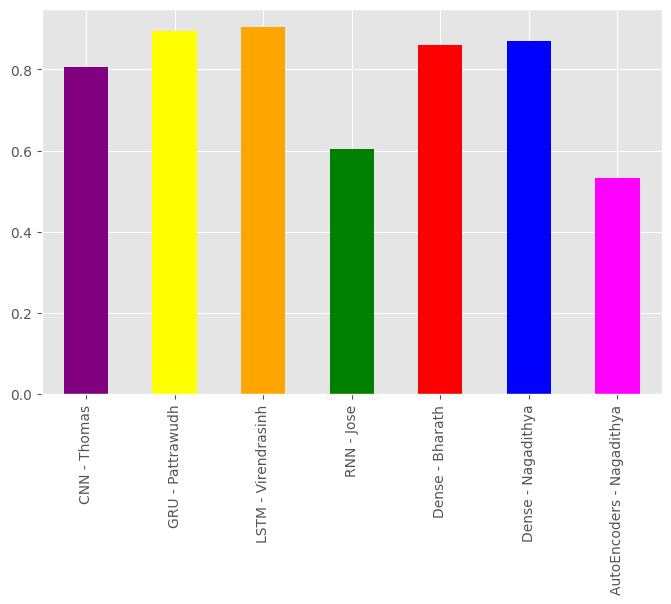

In [303]:
#x = np.arange(len(performance))
width = 0.3
metric_name = 'R2/RMSE/RMSPE'

model_list = {'CNN - Thomas' : {'R2' : 0.805, 'RMSE' : 1, 'RMSPE' : 1},
              'GRU - Pattrawudh' : {'R2' : 0.89339, 'RMSE' : 0.03026, 'RMSPE' : 0.22928}, 
              'LSTM - Virendrasinh' : {'R2' : 0.903, 'RMSE' : 0.02923, 'RMSPE' : 0.20995},
              'RNN - Jose' : {'R2' : 0.60413, 'RMSE' : 0.05821, 'RMSPE' : 0.51092},
              'Dense - Bharath' : {'R2' : 0.86, 'RMSE' : 1, 'RMSPE' : 1}, 
              'Dense - Nagadithya' : {'R2' : 0.87, 'RMSE' : 1, 'RMSPE' : 1},
              'AutoEncoders - Drew' : {'R2' : 0.533, 'RMSE' : 1, 'RMSPE' : 1}
             }
per = pd.DataFrame.from_dict(model_list)
per = per.T

R2 = per['R2']
RMSE = per['RMSE']
RMSPE = per['RMSPE']

axes1 = R2.plot.bar(rot=90, figsize=(8, 5), color={"red", "green", "blue", "orange", "purple", "magenta", "yellow"})
#axes = per.plot.bar(rot=0, subplots=True, figsize=(8, 15))

In [286]:
# axes2 = RMSPE.plot.bar(rot=0, figsize=(10, 6), color = 'blue')